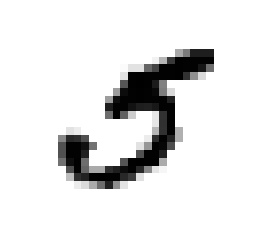

array([[6052, 6862, 5835, 5979, 5837, 5255, 6061, 6282, 5862, 5975]])

In [29]:

from sklearn.datasets import fetch_mldata
mnist = fetch_mldata("MNIST original")
X, y = mnist["data"], mnist["target"]
X.shape

%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

shuffle_index = np.random.permutation(60000)

X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]
X_train, y_train = X_train[shuffle_index], y_train[shuffle_index]

from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import RandomForestClassifier

knn_clf = KNeighborsClassifier()
knn_clf.fit(X_train, y_train)



sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(X_train, y_train)

#forest_clf = RandomForestClassifier()
#forest_clf.fit(X_train, y_train)
#forest_clf.prediction_proba([some_digit])

from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train.astype(np.float64))
y_train_pred = cross_val_predict(sgd_clf, X_train_scaled, y_train, cv=3)
conf_mx = confusion_matrix(y_train, y_train_pred)
row_sums = conf_mx.sum(axis=0, keepdims=True)
row_sums

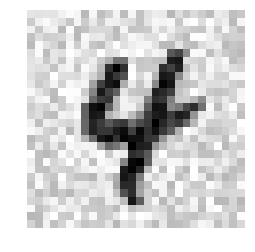

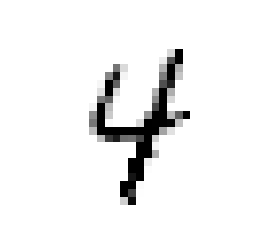

In [37]:
noise = np.random.randint(0, 100, (len(X_train), 784))
X_train_mod = X_train + noise
noise = np.random.randint(0, 100, (len(X_test), 784))
X_test_mod = X_test + noise
y_train_mod = X_train
y_test = X_test


def plot_image(img_arr):
    img_mtrx = img_arr.reshape(28, 28)
    plt.imshow(img_mtrx, cmap=matplotlib.cm.binary, interpolation="nearest")
    plt.axis("off")
    plt.show()


some_index = 5050
plot_image(X_test_mod[some_index])    

from sklearn.neighbors import KNeighborsClassifier

knn_clf = KNeighborsClassifier()
knn_clf.fit(X_train_mod, y_train_mod)
clean_digit = knn_clf.predict([X_test_mod[some_index]])

plot_image(clean_digit)